# Aprendizado Não Supervisionado

<br><br>

Na aprendizagem supervisionada, temos um dataset com n instâncias e variáveis $X_1$, .., $X_p$; além de uma variável target Y bem definida. Neste contexto, o objetivo dos modelos de machine learning é a predição da variável Y e afim de generalizar o dataset de treino.

Por outro lado, quando consideramos a __aprendizagem não supervisionada__, nós __não possuimos uma variável target__! Neste caso, o objetivo final não é a predição, mas sim __aprender padrões nos dados__, com objetivos diversos, desde retirar insights nos dados até facilitar a visualização dos mesmos.


Existem muitas técnicas de aprendizagem não supervisionada; iremos estudar uma em particular: __agrupamento__ - ou __clustering__ em inglês.

Mas antes de entrarmos a fundo no tema de clusterização, vamos discutir alguns __desafios__ encontrados ao se trabalhar com aprendizado não supervisionado. Geralmente, __é mais difícil trabalhar com aprendizado não supervisionado do que com aprendizado supervisionado__. Isso deve-se ao fato de que como não existe a variável target no aprendizado não supervisionado, a noção de "certo VS errado" é subjetiva e __dependente da interpretação do cientista de dados.__ Para ter uma melhor interpretação, é muito importante que o cientista de dados conheça bem o problema em que está trabalhando. 

Finalmente, vale também mencionar que é muito comum utilizar clustering e outras técnicas de aprendizado não supervisionado para fazer análises exploratórias nos dados. 

<br>

## Clusterização 

<br>

O objetivo principal de clusterizar os dados é de agrupá-los em __conjuntos similares ou homogêneos__; esses grupos são também conhecidos como __clusters__, daí o nome da técnica. Neste caso, uma primeira questão a ser respondida é: __o que significa ser similar?__ Precisaremos discutir isso ao longo do texto!

Antes disso, considere __alguns exemplos__ onde clusterização pode ser muito interessante:

Primeiro, suponha que você possua um dataset com N pacientes que possuam câncer de pulmão. Para cada paciente, você possui informações a respeito da doença, registradas em variáveis. Ao analisar o dataset em questão, você percebe que existe uma certa variabilidade nos dados e suspeita de que possam existir subtipos de câncer de pulmão, ainda não detectados. Ao aplicar uma técnica de clusterização e segmentar os dados em grupos similares, podem ser descobertos esses subgrupos.

Segundo, uma aplicação no mundo de marketing. Considere que você possui informações de vários clientes de sua loja, desde idade, sexo, salário, grau de escolaridade e informações históricas de compra em sua loja. Desta forma, pode ser realizada uma segmentação nessa base de usuários a fim de descobrir grupos de usuários com perfis de consumo similares, de modo a direcionar campanhas de marketing mais efetivas.



Vamos, ao longo deste  módulo, discutir o algoritmo __K-Means__, talvez o algoritmo de clusterização mais famoso e utilizado. 

Para motivar o KMeans, considere o seguinte exemplo:


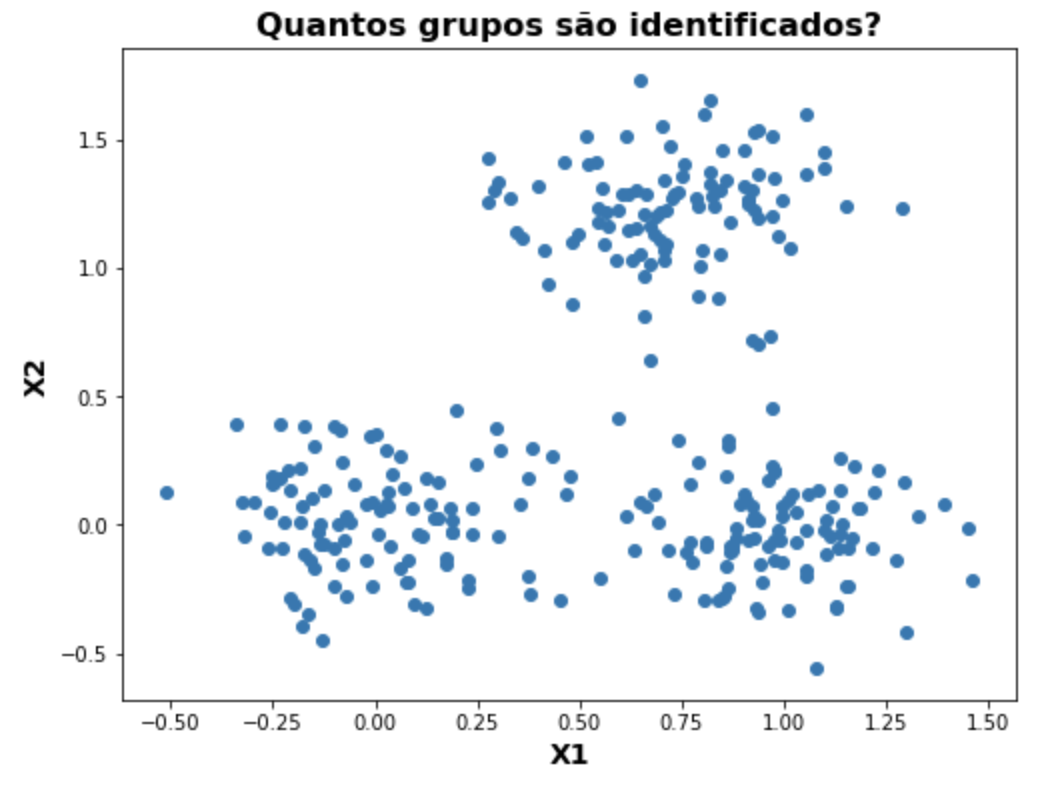

<br><br>

Da figura acima, é intuitivo perceber __3 grupos similares - ou clusters__. Como chegamos nesta conclusão?

Intuitivamente, a lógica por trás é __associar cada grupo a um ponto único na figura__ e a partir destes pontos, associar os outros pontos a estes pontos. Veja: 

<br>

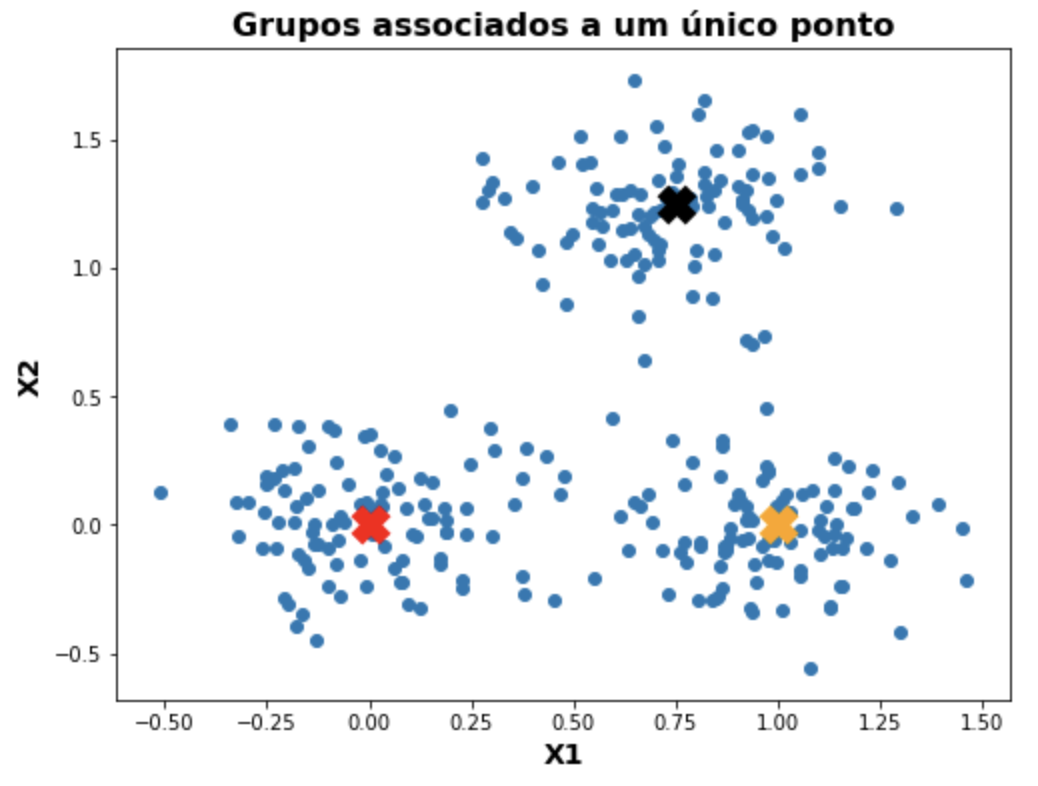

<br><br>

Esses pontos são conhecidos como __centróides__!

A partir dos centróides, podemos associar cada ponto da figura a um único centróide, de modo a termos nossa segmentação feita.

<br>

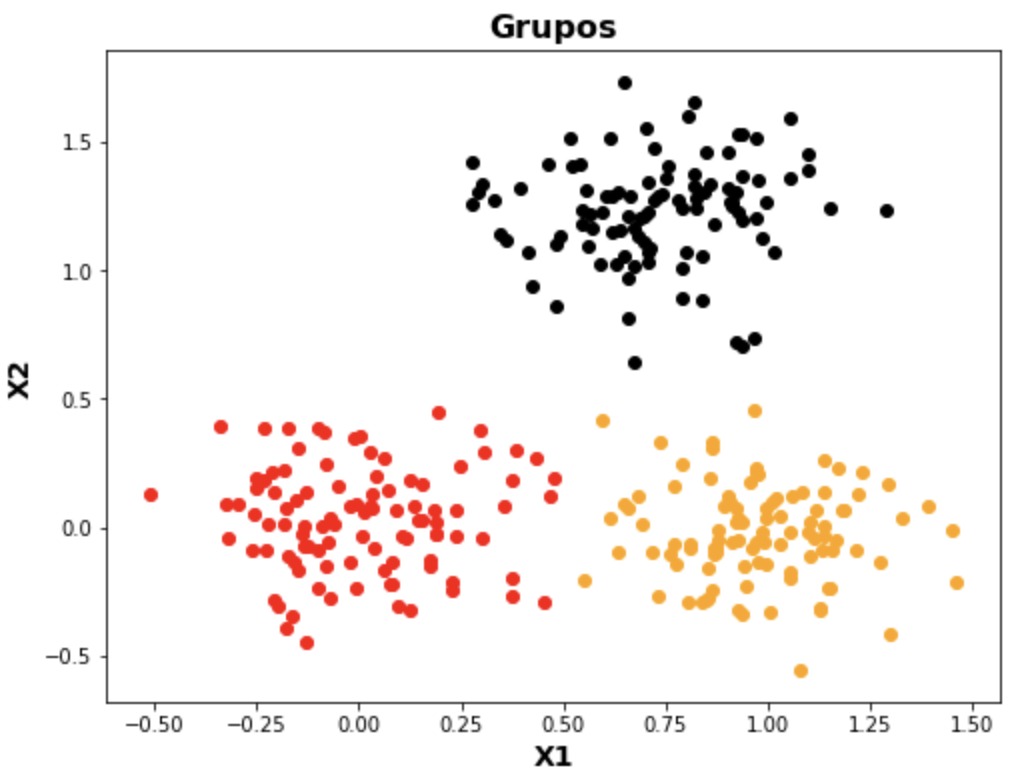

<br><br>

Essencialmente, essa é a ideia do algoritmo KMeans!

Segue abaixo a __lógica implementada pelo algoritmo:__

<br>
    
__1- Defina o número de clusters a ser construido - K;__

__2- Para cada instância do dataset, associe de forma aleatória um número entre 1, 2, .. e K.__

__3- Repita até um critério de parada:__

__3.1- Para cada um dos K clusters, calcule o centróide do cluster. O centróide é um vetor de mesma dimensão que as instâncias do dataset. Cada coordenada do centróide é dada pela média dos pontos que estão no cluster.__
 
__3.2- Reassocie cada instância do dataset de acordo com o centróide que estiver mais próximo;__

        
Vejamos abaixo uma figura mostrando as iterações do K-Means:

<br>

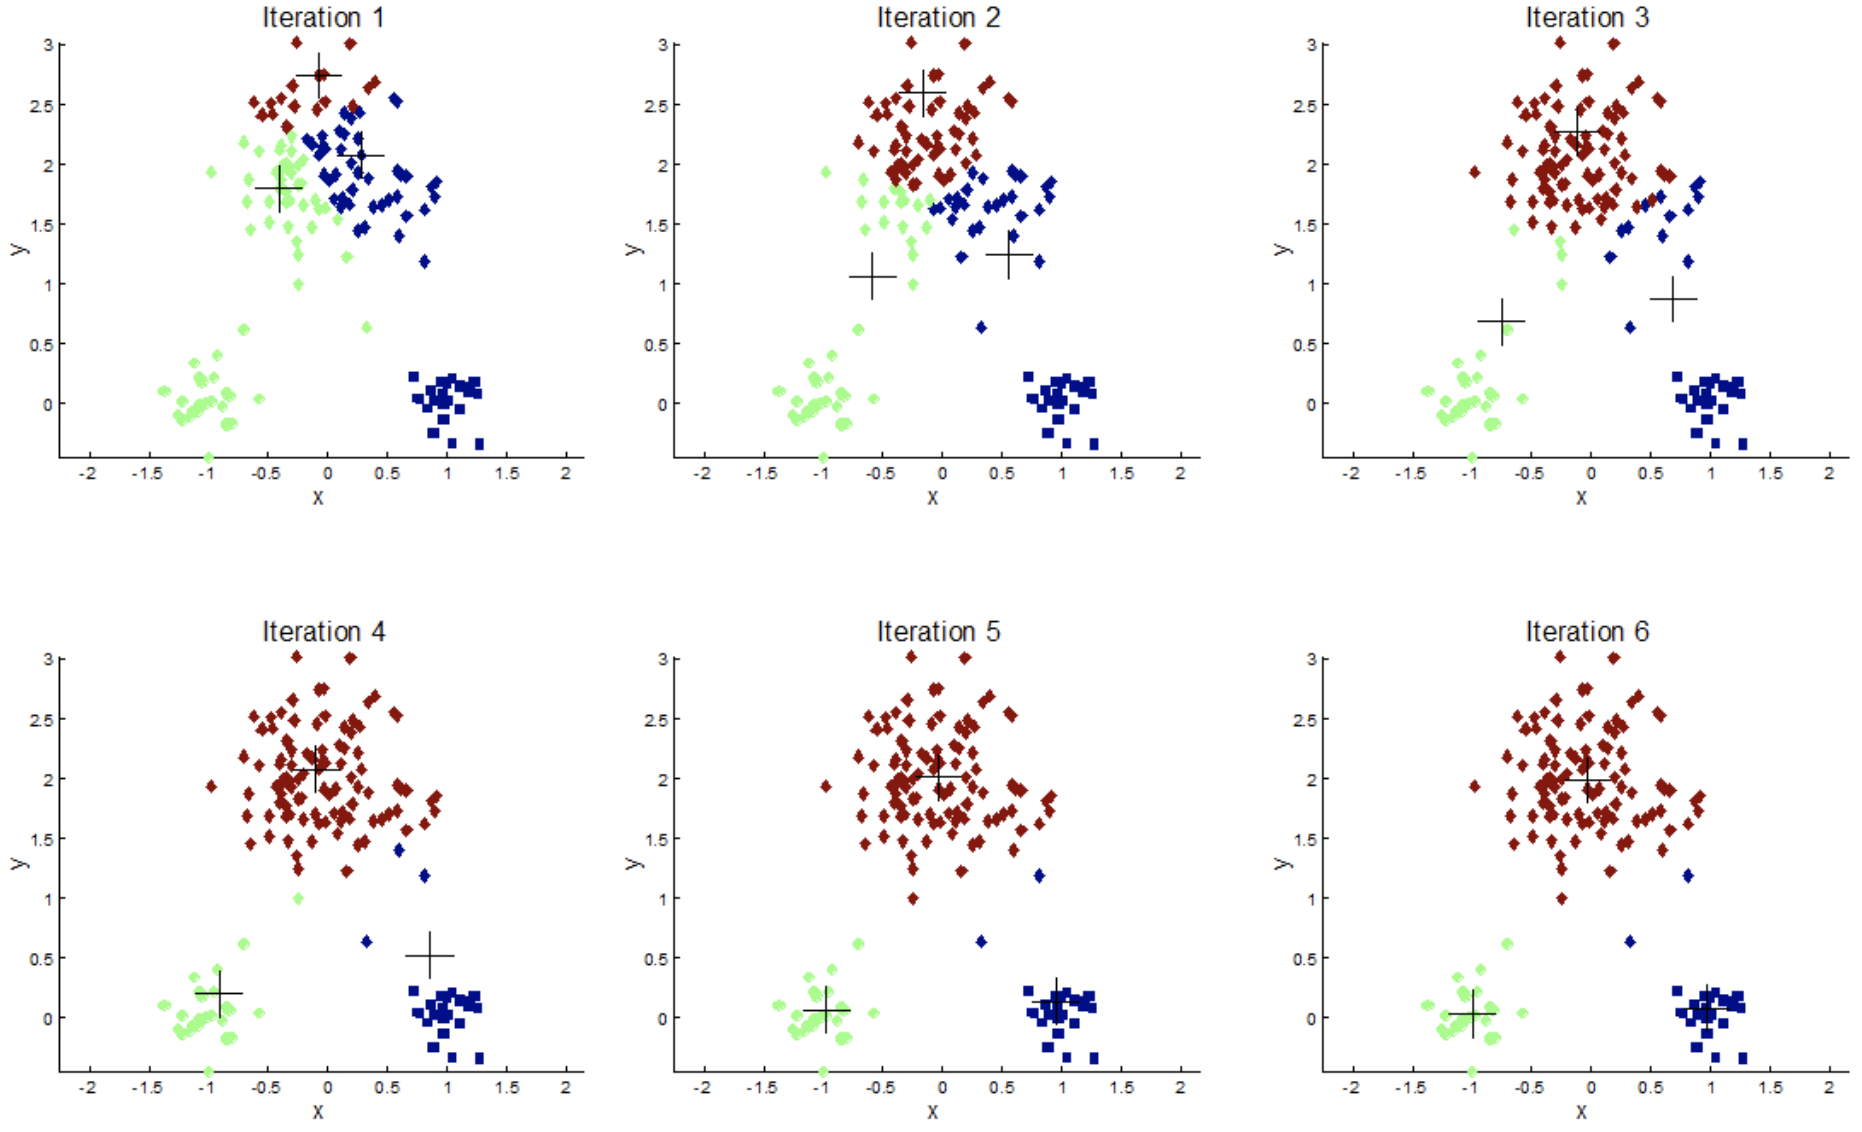

<br><br><br><br>

## KMeans no python:

<br>


Vamos agora usar o scikit-learn para aplicar o KMeans em alguns dataset:

página para documentação: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

from sklearn.cluster import KMeans

In [2]:
X, _ = make_blobs(n_samples=300, centers=[[0,0], [1,0], [0.75, 1.25]], cluster_std=0.2, random_state=0)
X.shape

(300, 2)

In [3]:
X

array([[ 1.90017684e-01, -3.02714417e-02],
       [ 1.39118246e+00,  7.80186645e-02],
       [ 9.29313650e-01, -3.23294838e-01],
       [-9.11065007e-02,  3.49583181e-03],
       [ 9.31324879e-02, -3.07248737e-01],
       [ 1.03130131e+00,  4.64362072e-02],
       [ 1.01382738e+00,  1.07351624e+00],
       [ 4.83557669e-01,  8.56275062e-01],
       [ 8.91427705e-01,  8.32100093e-02],
       [ 1.34458951e-01,  8.14923672e-02],
       [ 9.38493624e-01,  1.19648105e+00],
       [-2.06437704e-02,  8.21197004e-02],
       [-1.38913572e-01, -2.99269081e-02],
       [ 3.02079188e-01,  1.33029981e+00],
       [ 1.04655332e-01, -3.43092662e-02],
       [ 7.01596034e-01,  1.55365223e+00],
       [ 6.46496191e-01,  1.05423403e+00],
       [ 6.36137589e-01,  1.30398087e+00],
       [ 6.70954203e-01,  1.01811590e+00],
       [ 5.55779086e-01,  1.31296344e+00],
       [ 1.52207545e-01,  2.43350033e-02],
       [-2.29493730e-01, -8.75640089e-02],
       [-1.01930436e-01, -8.76148603e-02],
       [-8.

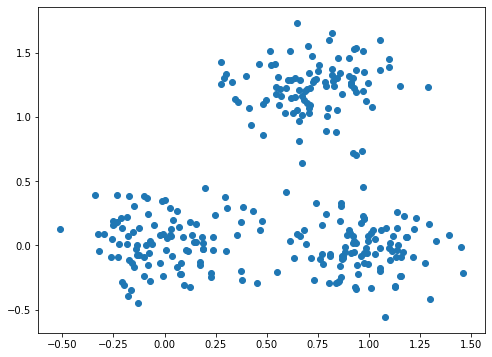

In [4]:
plt.figure(figsize=[8,6])
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [5]:
km = KMeans(n_clusters = 3) 

km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
km.cluster_centers_

array([[ 0.97646735, -0.0240432 ],
       [ 0.7275285 ,  1.22937247],
       [ 0.00444566,  0.02947364]])

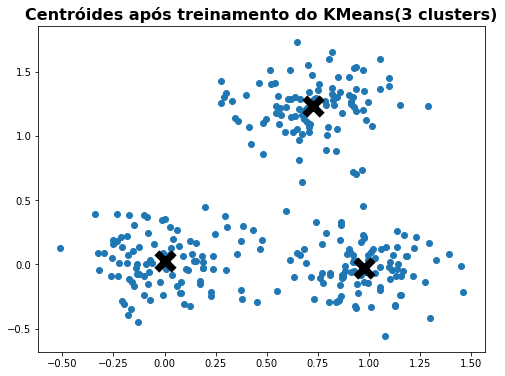

In [8]:
plt.figure(figsize=[8,6])
plt.scatter(X[:, 0], X[:, 1])
plt.title("Centróides após treinamento do KMeans(3 clusters)", fontsize = 16, fontweight = 'bold')
for centr in km.cluster_centers_:
    plt.scatter(centr[0], centr[1], s = 300, marker = 'x', c = 'black', lw = 7)
plt.show()

In [9]:
km.predict(X)

array([2, 0, 0, 2, 2, 0, 1, 1, 0, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 1, 2,
       0, 1, 1, 1, 1, 2, 2, 2, 1, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 1, 1, 1,
       1, 2, 0, 2, 0, 1, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 1, 0, 0, 2, 2, 0,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 1, 2, 1, 2, 2, 1, 2, 2, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 1,
       1, 0, 2, 0, 2, 1, 0, 2, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, 0, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 1, 2, 0, 0, 0, 2, 1, 0, 1, 2, 1,
       2, 1, 2, 2, 1, 0, 0, 0, 0, 2, 1, 1, 2, 0, 0, 0, 2, 1, 2, 2, 1, 2,
       0, 0, 2, 0, 1, 1, 1, 2, 2, 0, 1, 1, 1, 0, 1, 2, 0, 0, 2, 0, 0, 1,
       2, 0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 1, 1, 0, 2, 2, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1,
       0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 1], d

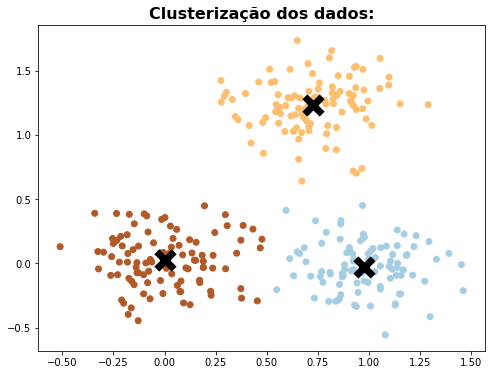

In [10]:
plt.figure(figsize=[8,6])
plt.title("Clusterização dos dados:", fontsize = 16, fontweight = 'bold')
plt.scatter(X[:, 0], X[:, 1], c = km.predict(X), cmap = plt.cm.Paired)
for centr in km.cluster_centers_:
    plt.scatter(centr[0], centr[1], s = 300, marker = 'x', c = 'black', lw = 7)
plt.show()

<br><br>

Como ficariam as segmentações caso tivéssemos usado outra quantidade de clusters?

<br>

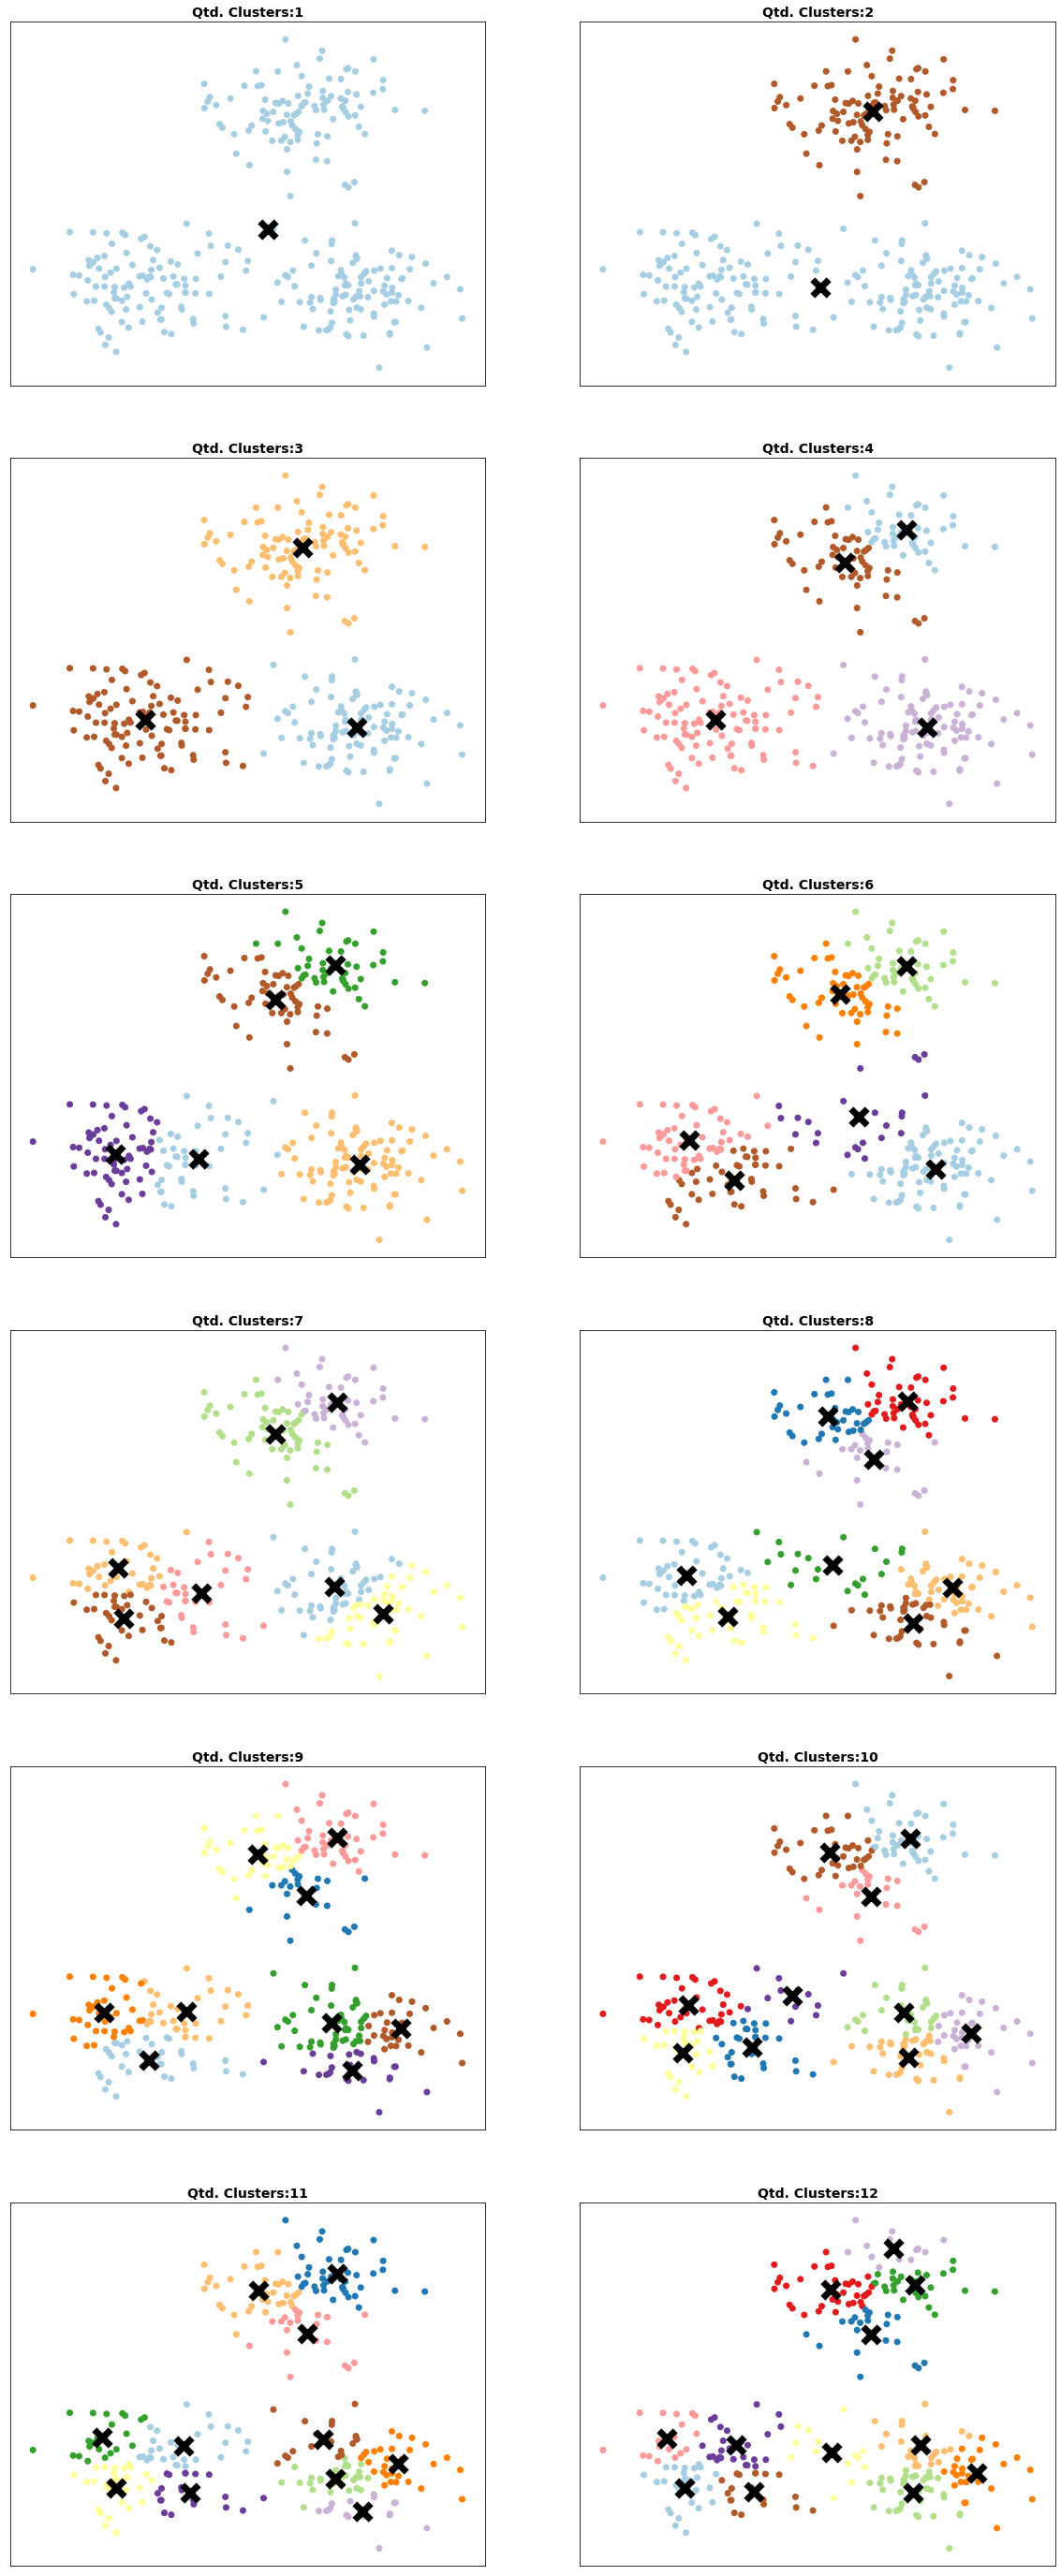

In [11]:
plt.figure(figsize=[20,50])

for k in range(1, 13):
    km = KMeans(n_clusters=k)
    km.fit(X)
    plt.subplot(6,2,k)
    plt.title("Qtd. Clusters:" + str(k), fontsize = 14, fontweight = 'bold')
    plt.scatter(X[:, 0], X[:, 1], c = km.predict(X), cmap = plt.cm.Paired)
    for centr in km.cluster_centers_:
        plt.scatter(centr[0], centr[1], s = 300, marker = 'x', c = 'black', lw = 7)
    plt.xticks([])
    plt.yticks([])
plt.show()

<br><br>

Qual é a quantidade correta de clusters?!

Como dissemos antes, __não existe resposta correta!__ É fundamental entender qual o problema que está sendo trabalhado e definir a quantidade de clusters de acordo. 

Ainda neste ponto, __após a construção dos clusters, é muito importante uma avaliação dos resultados__ de modo a entender se as segmentações estão fazendo sentido e se possuem uma interpretação boa para o problema!

<br><br>

## Interpretação do KMeans como um algoritmo de otimização

<br>

Considere um __dataset X__ (array de dimensão (n,p) qualquer) e uma __quantidade de clusters K fixada.__

Dessa forma, possuímos __K centróides, $C_1, C_2, .., C_k$.__ Além disso, para cada instância, podemos associá-la a um centróide específico (essa é a construção dos clusters).

Podemos definir a __métrica: WCSS__. Do inglês, WCSS significa __within cluster sum of squares,__ ou seja, __a soma dos quadrados dentro dos clusters!__ Essa métrica é também conhecida como __inertia__. Sua fórmula é:

### WCSS = $\sum_{cluster_k} \sum_{x_i \in cluster_{k}} ||x_i - C_k||^{2}$, 

em que $||x_i - C_k||^{2}$ é a soma dos quadrados das diferenças em cada coordenada. Por exemplo, em duas dimensões:

$x_i = (x_{i_1}, x_{i_2}), C_k = (C_{k_1}, C_{k_2})$, logo:

$||x_i - C_k||^{2} = (x_{i_1} - C_{k_1})^2 + (x_{i_2} - C_{k_2})^2.$

Naturalmente, para cada escolha de centróides, podemos calcular a WCSS.

Desta forma, podemos interpretar a WCSS como uma função de custo, a qual queremos minimizar! 

Em outras palavras, tendo X e K (dataset e número de clusters) fixados, o __KMeans é o modelo cujos centróides minimizam a WCSS.__

<br>

Resolver esse problema computacionalmente é difícil e a abordagem iterativa do KMeans é uma solução aproximada para esse problema de minimização!

Tendo entendido a WCSS, podemos discutir a respeito da:

<br>

### __Heurística__ da escolha da quantidade K de clusters 

<br>

Por construção da métrica WCSS, quanto maior for o número de clusters, menor fica a WCSS final.

Ainda, se X tem N linhas, então se fixamos K = N clusters, teremos que cada instância do dataset X será o próprio cluster, de modo que WCSS = 0 neste caso.

Podemos __plotar um gráfico__ conhecido como __Curva de Elbow__ que consiste dos valores de WCSS para cada quantidade de cluster.

Por exemplo, veja abaixo para nosso dataset de estudo:

<br>

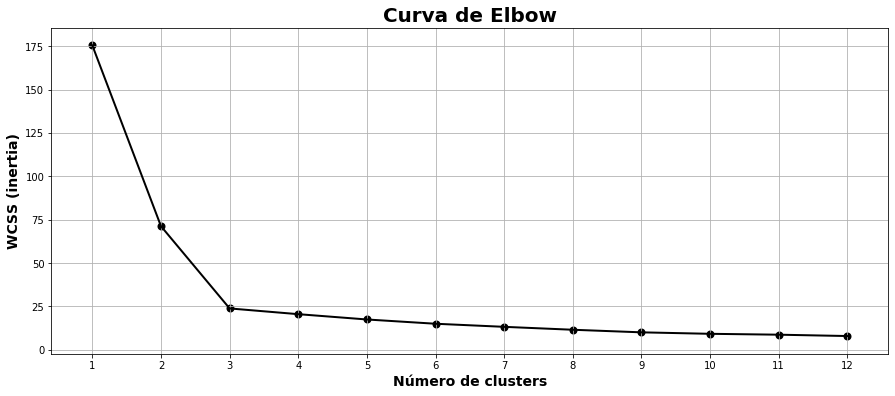

In [12]:
#calculando as inertias - WCSS para cada cluster
lista_inertias = []
for i in range(1, 13):
    km = KMeans(n_clusters=i)
    km.fit(X)
    lista_inertias.append(km.inertia_)
    
    
#plotando a curva de elbow    
plt.figure(figsize=[15,6])
plt.title("Curva de Elbow", fontsize = 20, fontweight = 'bold')
plt.xlabel("Número de clusters", fontsize = 14, fontweight = 'bold')
plt.ylabel("WCSS (inertia)", fontsize = 14, fontweight = 'bold')
plt.plot(range(1, 1+len(lista_inertias)), lista_inertias, c = 'black', lw = 2)
plt.scatter(range(1, 1+len(lista_inertias)), lista_inertias, c = 'black', lw = 2)
plt.xticks(range(1,1+len(lista_inertias)))
plt.grid()
plt.show()

In [13]:
#inertia para o caso extremo em que K = qtd. linhas do dataset de treino
km = KMeans(n_clusters = X.shape[0])
km.fit(X)
km.inertia_

0.0

<br>

Observe o padrão do gráfico!

Vemos que a WCSS (inertia) cai rapidamente de 1 para 2 clusters, novamente rapidamente de 2 para 3 clusters.

A partir de 3 clusters, a queda da WCSS já é mais amena. 

Dessa forma, podemos __interpretar__ que o valor de __3 clusters__, nesse exemplo, foi o __valor ótimo de K.__

A interpretação seria que "não compensa" ter mais do que 3 clusters, visto que a melhoria em termos da métrica não é substancial. 

Além disso, por curiosidade, elbow significa "cotovelo" em inglês, visto que o formato da curva lembra um cotovelo!

<br><br>

Vamos agora __trabalhar com um__

## Case prático:

<br>

Considere o dataset abaixo. Ele contém informações socio-econômicas de vários países. Nosso objetivo é, a partir da taxa de mortalidade infantil e da renda per capta dos países, agrupá-los usando o KMeans.

<br>

In [14]:
df = pd.read_csv("countries of the world.csv").dropna().reset_index(drop = True)
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,Anguilla,LATIN AMER. & CARIB,13477,102,"132,1","59,80","10,76","21,03",8600.0,"95,0","460,0",0,0,100,2,"14,17","5,34","0,04","0,18","0,78"
4,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,"156,0","34,54","-6,15","19,46",11000.0,"89,0","549,9","18,18","4,55","77,27",2,"16,93","5,37","0,038","0,22","0,743"


In [15]:
df.shape

(179, 20)

In [16]:
dff = df[['Country', 'Infant mortality (per 1000 births)', 'GDP ($ per capita)', ]].copy()
dff.columns = ['pais', 'mortalidade_infantil', 'renda_per_capta']
dff

,pais,mortalidade_infantil,renda_per_capta
0,Afghanistan,"163,07",700.0
1,Albania,"21,52",4500.0
2,Algeria,31,6000.0
3,Anguilla,"21,03",8600.0
4,Antigua & Barbuda,"19,46",11000.0
...,...,...,...
174,Venezuela,"22,2",4800.0
175,Vietnam,"25,95",2500.0
176,Yemen,"61,5",800.0
177,Zambia,"88,29",800.0


In [17]:
dff.mortalidade_infantil = dff.mortalidade_infantil.apply(lambda s: str(s).replace(",", ".")).astype(float)

In [18]:
dff

,pais,mortalidade_infantil,renda_per_capta
0,Afghanistan,163.07,700.0
1,Albania,21.52,4500.0
2,Algeria,31.00,6000.0
3,Anguilla,21.03,8600.0
4,Antigua & Barbuda,19.46,11000.0
...,...,...,...
174,Venezuela,22.20,4800.0
175,Vietnam,25.95,2500.0
176,Yemen,61.50,800.0
177,Zambia,88.29,800.0


<br>

Como o __KMeans trabalha com distâncias, vamos normalizar os dados__ antes de aplicar o algoritmo. Essa é uma etapa muito importante neste algoritmo!

<br>

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
st = StandardScaler()
Xsc = st.fit_transform(dff.values[:, 1:])

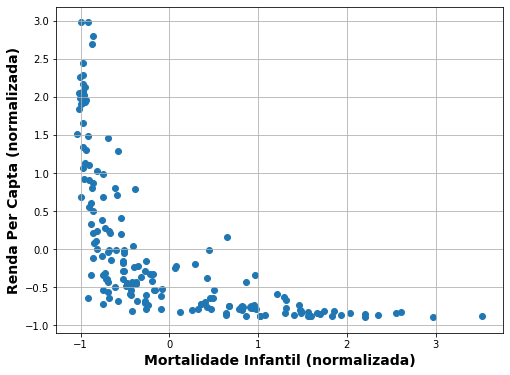

In [21]:
plt.figure(figsize=[8,6])
plt.scatter(Xsc[:,0], Xsc[:, 1])
plt.xlabel("Mortalidade Infantil (normalizada)", fontsize = 14, fontweight = 'bold')
plt.ylabel("Renda Per Capta (normalizada)", fontsize = 14, fontweight = 'bold')
plt.grid()
plt.show()

<br>

Vemos que o comportamento do gráfico faz sentido: a medida que a taxa de mortalidade infantil aumenta, a renda per capta tende a diminuir.

Podemos também confirmar isso pela alta correlação negativa entre as variáveis:

In [22]:
dff.corr()

,mortalidade_infantil,renda_per_capta
mortalidade_infantil,1.00000,-0.63909
renda_per_capta,-0.63909,1.00000


<br>

Qual deveria ser a quantidade de clusters a considerar?

Como não temos uma ideia inicial pré-estabelecida, __vamos utilizar a heurística da Curva de Elbow__ para essa escolha:
    
<br>

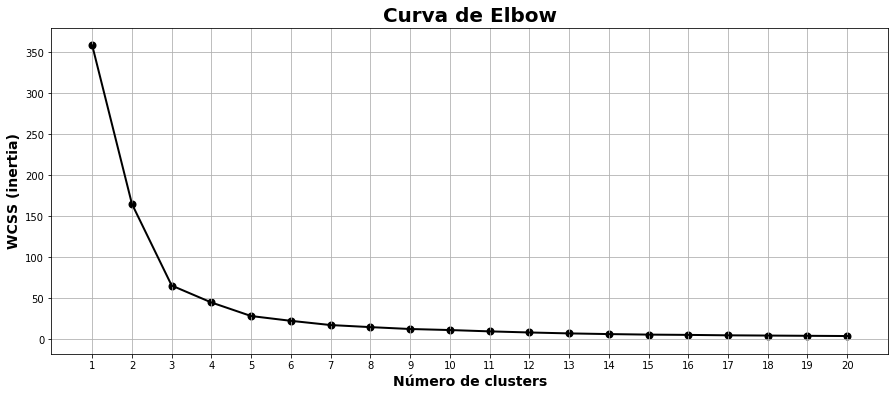

In [23]:
l=[]
for k in range(1, 21):
    km = KMeans(n_clusters=k)
    km.fit(Xsc)
    l.append(km.inertia_)

plt.figure(figsize=[15,6])
plt.title("Curva de Elbow", fontsize = 20, fontweight = 'bold')
plt.xlabel("Número de clusters", fontsize = 14, fontweight = 'bold')
plt.ylabel("WCSS (inertia)", fontsize = 14, fontweight = 'bold')
plt.plot(range(1, 1+len(l)), l, c = 'black', lw = 2)
plt.scatter(range(1, 1+len(l)), l, c = 'black', lw = 2)
plt.xticks(range(1,1+len(l)))
plt.grid()
plt.show()

<br>

Novamente, (curiosamente) vemos que __3 clusters__ parece uma boa escolha. Note que também poderíamos dizer que 5 clusters seria uma escolha.

Ao longo do notebook, vamos trabalhar com 3 clusters, mas fique como exercício estudar o KMeans com 5 clusters!!

<br>

In [24]:
km = KMeans(n_clusters=3).fit(Xsc)

In [25]:
dff['km3'] = km.predict(Xsc)
dff

,pais,mortalidade_infantil,renda_per_capta,km3
0,Afghanistan,163.07,700.0,1
1,Albania,21.52,4500.0,0
2,Algeria,31.00,6000.0,0
3,Anguilla,21.03,8600.0,0
4,Antigua & Barbuda,19.46,11000.0,0
...,...,...,...,...
174,Venezuela,22.20,4800.0,0
175,Vietnam,25.95,2500.0,0
176,Yemen,61.50,800.0,1
177,Zambia,88.29,800.0,1


In [26]:
dff.loc[dff.pais == 'Brazil '].km3.values[0]

0

In [27]:
dff.loc[dff.pais == 'France '].km3.values[0]

2

In [28]:
dff.loc[dff.pais == 'Afghanistan '].km3.values[0]

1

<br><br>

Vemos que o Brasil, França e Afeganistão estão em clusters distintos. Vamos olhar quais são os outros países nesses clusters:

<br>

In [29]:
print("países no mesmo cluster que o Brasil:\n")
print(dff.loc[dff.km3 ==  dff.loc[dff.pais == 'Brazil '].km3.values[0]].pais.values)

países no mesmo cluster que o Brasil:

['Albania ' 'Algeria ' 'Anguilla ' 'Antigua & Barbuda ' 'Argentina '
 'Armenia ' 'Belarus ' 'Belize ' 'Bolivia ' 'Botswana ' 'Brazil '
 'Bulgaria ' 'Cape Verde ' 'Chile ' 'China ' 'Colombia ' 'Costa Rica '
 'Cuba ' 'Dominica ' 'Dominican Republic ' 'Ecuador ' 'Egypt '
 'El Salvador ' 'Estonia ' 'Fiji ' 'French Guiana ' 'Gabon ' 'Georgia '
 'Ghana ' 'Grenada ' 'Guadeloupe ' 'Guatemala ' 'Guyana ' 'Honduras '
 'Hungary ' 'Indonesia ' 'Iran ' 'Iraq ' 'Jamaica ' 'Jordan '
 'Kazakhstan ' 'Korea, North ' 'Kyrgyzstan ' 'Latvia ' 'Malaysia '
 'Marshall Islands ' 'Martinique ' 'Mauritius ' 'Mexico '
 'Micronesia, Fed. St. ' 'Namibia ' 'Netherlands Antilles ' 'Nicaragua '
 'Oman ' 'Palau ' 'Panama ' 'Papua New Guinea ' 'Paraguay ' 'Peru '
 'Philippines ' 'Poland ' 'Reunion ' 'Romania ' 'Saint Kitts & Nevis '
 'Saint Lucia ' 'Saint Vincent and the Grenadines ' 'Samoa '
 'Sao Tome & Principe ' 'Saudi Arabia ' 'Seychelles ' 'Sri Lanka '
 'Suriname ' 'Syria ' '

<br><br>

In [30]:
print("países no mesmo cluster que a França:\n")
print(dff.loc[dff.km3 ==  dff.loc[dff.pais == 'France '].km3.values[0]].pais.values)

países no mesmo cluster que a França:

['Aruba ' 'Australia ' 'Austria ' 'Bahamas, The ' 'Bahrain ' 'Barbados '
 'Belgium ' 'Bermuda ' 'British Virgin Is. ' 'Brunei ' 'Cayman Islands '
 'Czech Republic ' 'Denmark ' 'Finland ' 'France ' 'French Polynesia '
 'Germany ' 'Greece ' 'Hong Kong ' 'Iceland ' 'Ireland ' 'Israel '
 'Japan ' 'Korea, South ' 'Kuwait ' 'Liechtenstein ' 'Macau '
 'Netherlands ' 'New Caledonia ' 'New Zealand ' 'Norway ' 'Portugal '
 'Puerto Rico ' 'Qatar ' 'Singapore ' 'Spain ' 'Sweden ' 'Switzerland '
 'Taiwan ' 'United Arab Emirates ' 'United Kingdom ' 'United States ']


<br><br>

In [31]:
print("países no mesmo cluster que a afeganistão:\n")
print(dff.loc[dff.km3 ==  dff.loc[dff.pais == 'Afghanistan '].km3.values[0]].pais.values)

países no mesmo cluster que a afeganistão:

['Afghanistan ' 'Azerbaijan ' 'Bangladesh ' 'Benin ' 'Bhutan '
 'Burkina Faso ' 'Burma ' 'Burundi ' 'Cambodia ' 'Cameroon '
 'Central African Rep. ' 'Chad ' 'Comoros ' 'Congo, Dem. Rep. '
 'Congo, Repub. of the ' "Cote d'Ivoire " 'Djibouti ' 'Equatorial Guinea '
 'Eritrea ' 'Ethiopia ' 'Gambia, The ' 'Guinea ' 'Guinea-Bissau ' 'Haiti '
 'India ' 'Kenya ' 'Laos ' 'Lesotho ' 'Liberia ' 'Madagascar ' 'Malawi '
 'Maldives ' 'Mali ' 'Mauritania ' 'Mongolia ' 'Mozambique ' 'Niger '
 'Nigeria ' 'Pakistan ' 'Rwanda ' 'Senegal ' 'Sierra Leone ' 'Somalia '
 'South Africa ' 'Sudan ' 'Swaziland ' 'Tajikistan ' 'Togo '
 'Turkmenistan ' 'Uganda ' 'Uzbekistan ' 'Vanuatu ' 'Yemen ' 'Zambia '
 'Zimbabwe ']


<br><br>

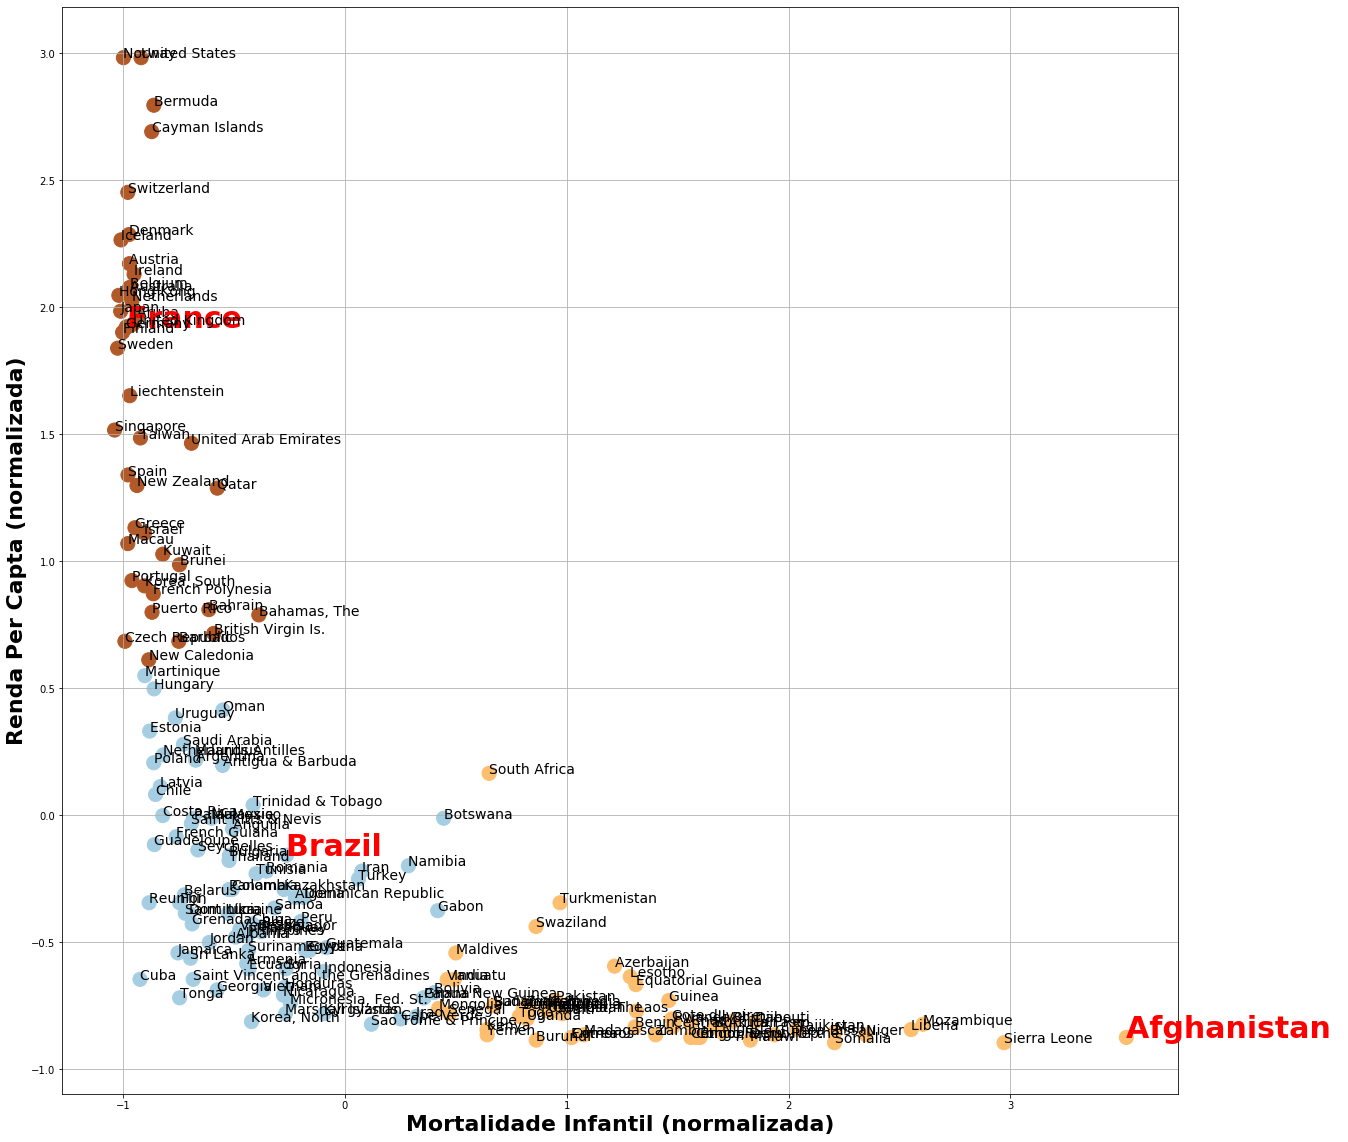

In [32]:
z = Xsc[:,0]
y = Xsc[:,1]

plt.figure(figsize=[20,20])
for i, txt in enumerate(dff.pais.values):
    if txt in ['Brazil ', 'France ', 'Afghanistan ']:
        plt.annotate(txt, (z[i], y[i]), fontsize = 30, fontweight = 'bold', color = 'red')
    else:
        plt.annotate(txt, (z[i], y[i]), fontsize = 14)
    
plt.scatter(Xsc[:,0], Xsc[:, 1], c = dff.km3, s = 200, cmap = plt.cm.Paired)
plt.xlabel("Mortalidade Infantil (normalizada)", fontsize = 22, fontweight = 'bold')
plt.ylabel("Renda Per Capta (normalizada)", fontsize = 22, fontweight = 'bold')
plt.grid()
plt.show()

<br>

Pelo gráfico, vemos que a segmentação criada pelo KMeans com 3 clusters fez bastante sentido e é bem interpretável.

Faça você uma análise desses resultados e teste outras quantidades de clusters!

<br>

<br><br>


## DBSCAN

<br>

Na  sequência, queremos __discutir outros algoritmos de segmentação.__

Para motivar nosso estudo, considere os datasets abaixo. Vamos começar aplicando o KMeans neles e analisar os resultados:
    
<br>

In [33]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles

In [34]:
def dataset1():
    centers = [[1, 1], [-1, -1], [1, -1]]
    X, _ = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                                random_state=0)
    return X

def dataset2():
    X, _ = make_circles(n_samples=750, factor=0.3, noise=0.1)
    return X

In [35]:
X1 = dataset1()
X2 = dataset2()

X1.shape, X2.shape

((750, 2), (750, 2))

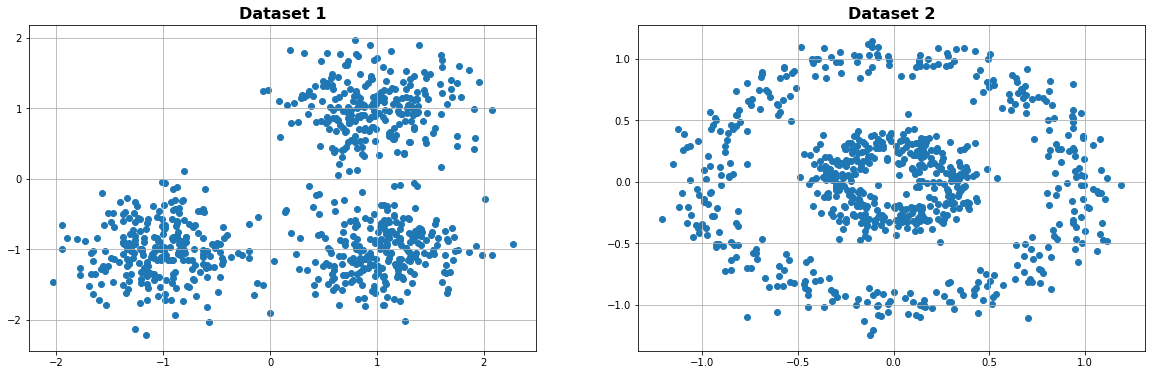

In [36]:
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
plt.title("Dataset 1", fontsize = 16, fontweight = 'bold')
plt.scatter(X1[:, 0], X1[:, 1])
plt.grid()
plt.subplot(1,2,2)
plt.title("Dataset 2", fontsize = 16, fontweight = 'bold')
plt.scatter(X2[:, 0], X2[:, 1])
plt.grid()
plt.show()

<br>

O primeiro conjunto de dados parece ter 3 clusters. Já o segundo, parece ter 2: um anel por fora e outro por dentro.
    
Vamos ver como o KMeans segmenta esses dados:
    
<br>

In [37]:
km1 = KMeans(n_clusters = 3).fit(X1)

km2 = KMeans(n_clusters = 2).fit(X2)

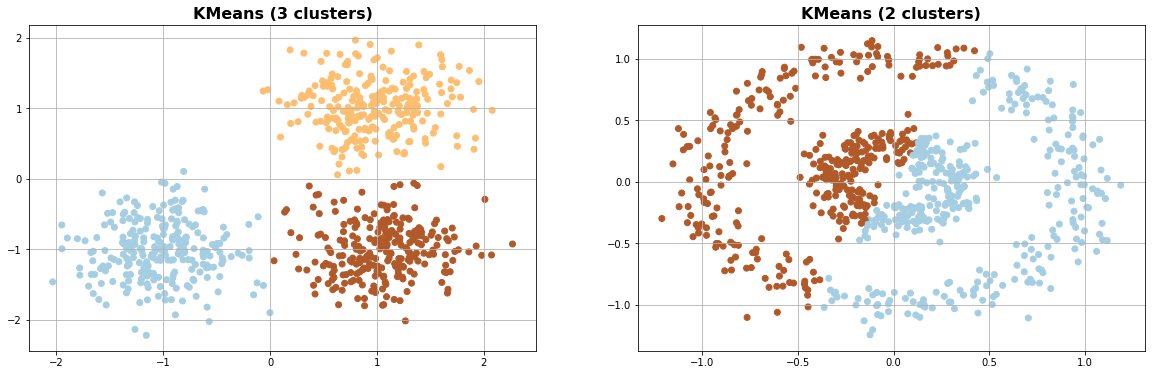

In [38]:
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
plt.title("KMeans (3 clusters)", fontsize = 16, fontweight = 'bold')
plt.scatter(X1[:, 0], X1[:, 1], c = km1.predict(X1), cmap = plt.cm.Paired)
plt.grid()
plt.subplot(1,2,2)
plt.title("KMeans (2 clusters)", fontsize = 16, fontweight = 'bold')
plt.scatter(X2[:, 0], X2[:, 1], c = km2.predict(X2), cmap = plt.cm.Paired)
plt.grid()
plt.show()

<br>

Claramente, o KMeans não conseguiu segmentar bem o segundo dataset. 

Isso já era esperado, pois o KMeans gera segmentações __circulares__, de modo que esse padrão apresentado pelo dataset 2 inviabiliza uma segmentação pelo KMeans.

Vamos discutir agora outro algoritmo de segmentação, o __DBSCAN__.

<br>


O algoritmo __DBSCAN - Density-Based Spatial Clustering of Applications with Noise__ é um algoritmo de clusterização que trabalha com conceitos de __densidade local__ dos clusters.

Ele é um algoritmo muito útil em várias situações, visto que o algoritmo consegue identificar clusters de formatos bem diferentes.

Antes de discutirmos a __lógica de aprendizado__ do DBSCAN, precisamos definir o conceito de vizinhança. Para isso, considere que temos um dataset X, com shape (n,p) fixado:

__$\epsilon$-Vizinhança de um ponto:__ Considere um número real positivo $\epsilon$ fixado. Para uma instância $x$, definimos a $\epsilon$-vizinhança de $x$ sendo o conjunto de outras instâncias que estão a uma distância de no máximo $\epsilon$ de $x$.

### Lógica do DBSCAN:

Fixe um número real positivo __$\epsilon$__ e um número inteiro posivito __M__: quantidade mínima de pontos. 

__1)__ Para cada instância $x$ no dataset X, calculamos a $\epsilon$-vizinhança de $x$.

__2)__ Se uma instância $x$ possui pelo menos __M__ pontos em sua $\epsilon$-vizinhança, então dizemos que $x$ é uma __instância core.__

__3)__ Todas as instâncias na $\epsilon$-vizinhança de uma instância core são definidas do mesmo cluster.
Dessa forma, se duas ou mais instâncias core estiverem na mesma vizinhança, então elas união os clusters, formando clusters maiores.

__4)__ Se uma instância não é uma instância core mas está na $\epsilon$-vizinhança de uma instância core, então essa instância é chamada __instância de borda__.

__5)__ Todas as instâncias que não são core nem borda, são consideradas __anomalias__.

<br>

A figura abaixo ilustra a lógica do DBSCAN. Neste caso, considere que fixamos uma distância $\epsilon$ para definir a vizinhança de cada ponto e que a quantidade mínima de pontos para definir uma instância "core" é 3.

<br>

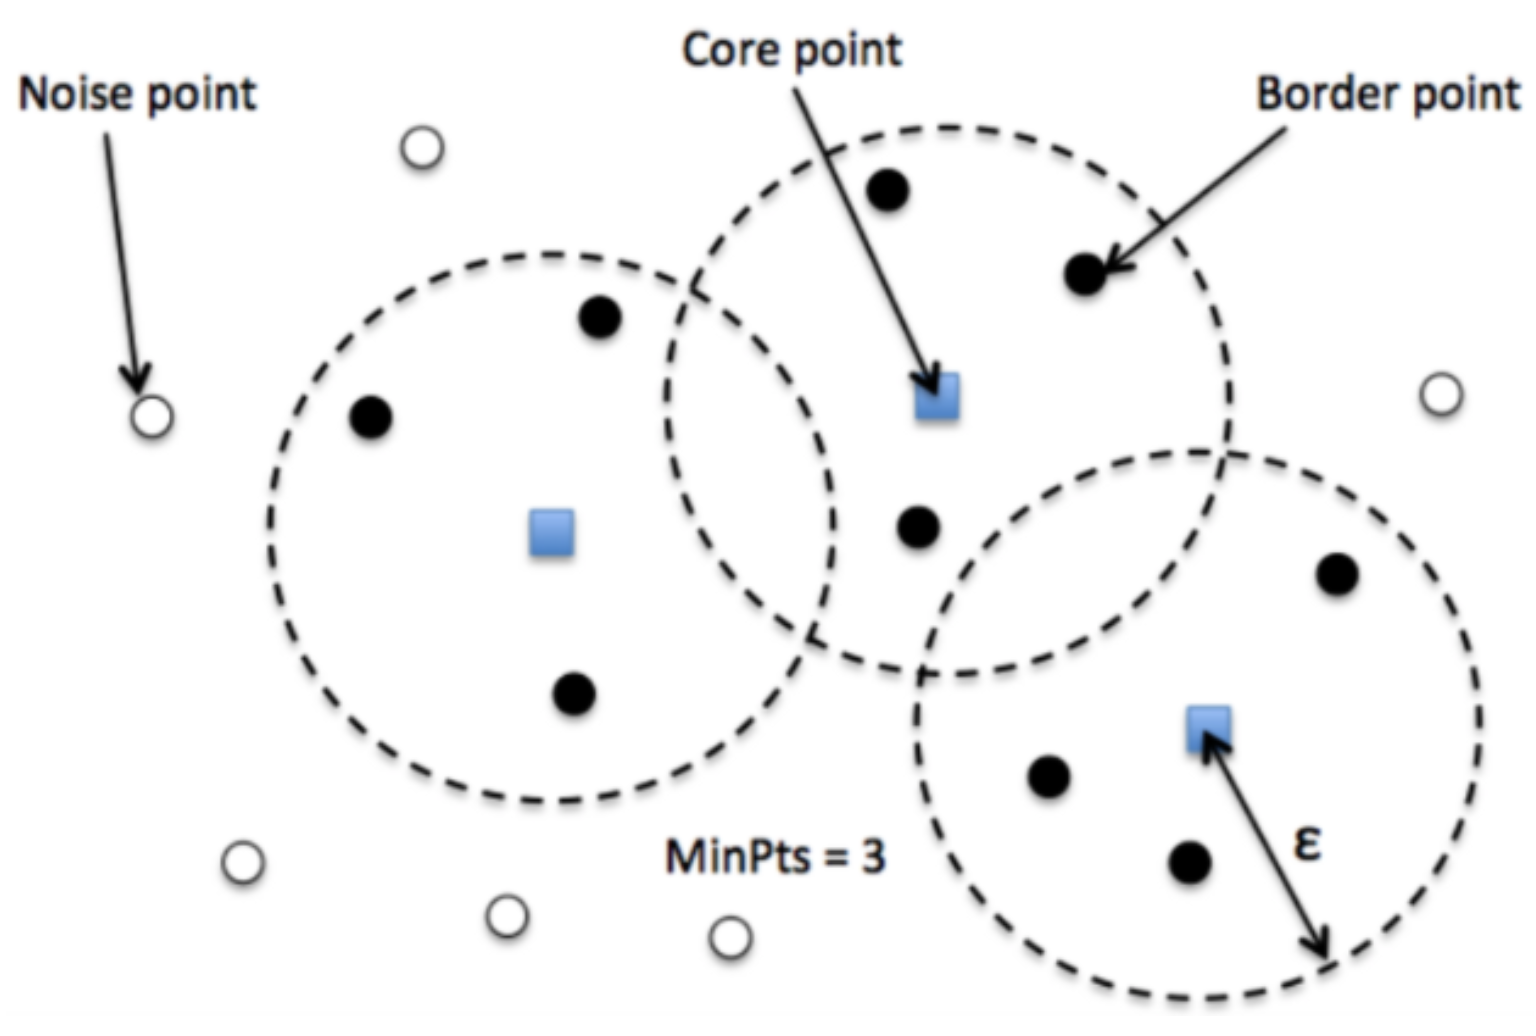

<br>

__Comentários:__

__1: O DBSCAN depende dos parâmetros $\epsilon$ e M__, como vimos.

Na prática, uma dificuldade para utilizar o DBSCAN é definir muito bem a quantidade mínima de pontos __M__ e o valor $\epsilon$ que caracteriza as vizinhanças.

__2: Não precisamos definir de antemão a quantidade de clusters.__ Isso é uma consequência da parametrização feita!


__3: O algoritmo nos fornece uma definição natural de anomalias:__ instâncias do dataset que estão em __regiões pouco densas__, indicando pontos isolados, ou fora do padrão dos dados.


<br>

Vamos aplicar o DBSCAN nos datasets 1 e 2 acima e comparar o resultados:

<br>

In [39]:
from sklearn.cluster import DBSCAN

In [40]:
db1 = DBSCAN(eps=0.3, min_samples=10).fit(X1)
db1

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [41]:
db1.labels_

array([ 0,  1,  0,  2,  0,  1,  1,  2,  0,  0,  1,  1,  1,  2,  1,  0, -1,
        1,  1,  2,  2,  2,  2,  2,  1,  1,  2,  0,  0,  2,  0,  1,  1,  0,
        1,  0,  2,  0,  0, -1,  2,  1,  1,  1,  1,  1,  0,  2,  0,  1,  2,
        2,  1,  1,  2,  2,  1,  0,  2,  1,  2,  2,  2,  2,  2,  0,  2,  2,
        0,  0,  0,  2,  0,  0,  2,  1, -1,  1,  0,  2,  1,  1,  0,  0,  0,
        0,  1,  2,  1,  2,  2,  0,  1,  0,  1, -1,  1,  1,  0,  0,  2,  1,
        2,  0,  2,  2,  2,  2, -1,  0, -1,  1,  1,  1,  1,  0,  0,  1,  0,
        1,  2,  1,  0,  0,  1,  2,  1,  0,  0,  2,  0,  2,  2,  2,  0, -1,
        2,  2,  0,  1,  0,  2,  0,  0,  2,  2, -1,  2,  1, -1,  2,  1,  1,
        2,  2,  2, -1,  1,  0,  1,  0,  1,  0,  2,  2, -1,  1,  2,  2,  1,
        0,  1,  2,  2,  2,  1,  1,  2,  2,  0,  1,  2,  0,  0,  2,  0,  0,
        1,  0,  1,  0,  1,  1,  2,  2,  0,  0,  1,  1,  2,  1,  2,  2,  2,
        2,  0,  2,  0,  2,  2,  0,  2,  2,  2,  0,  0,  1,  1,  1,  2,  2,
        2,  2,  1,  2,  2

<br>

Veja que a marcação "-1" dos labels indica as instâncias que foram consideradas anomalias!

<br>

In [42]:
df1 = pd.DataFrame(np.c_[X1, db1.labels_], columns = ['x1', 'x2', 'label_db1'])

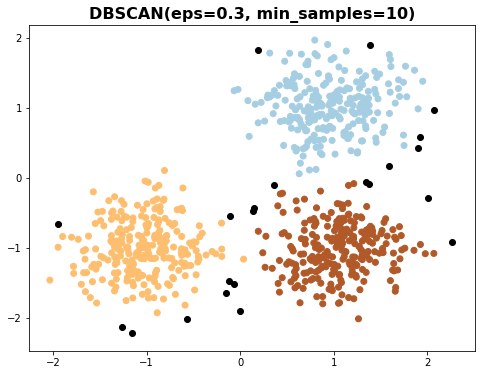

In [43]:
plt.figure(figsize=[8,6])
plt.title("DBSCAN(eps=0.3, min_samples=10)", fontsize = 16, fontweight = 'bold')
plt.scatter(df1.loc[df1.label_db1 != -1].x1, 
            df1.loc[df1.label_db1 != -1].x2, 
            c = df1.loc[df1.label_db1 != -1].label_db1,
            cmap = plt.cm.Paired)
plt.scatter(df1.loc[df1.label_db1 == -1].x1, 
            df1.loc[df1.label_db1 == -1].x2, 
            c = 'black')
plt.show()

<br>

Veja que os clusters foram encontramos e ainda tivemos a detecção de algumas anomalias!

Além disso, perceba que os parâmetros do DBSCAN afetam muito a definição dos clusters quando alterados:
    
<br>

Qtd. clusters definidos:  20 



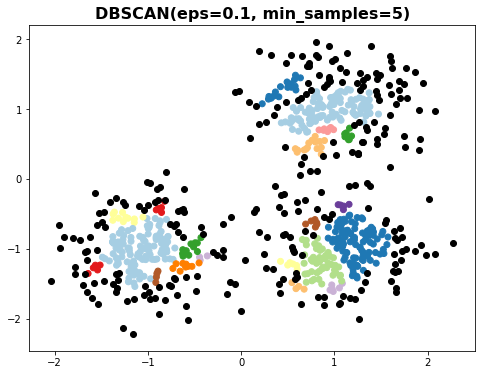

In [44]:
plt.figure(figsize=[8,6])
db1 = DBSCAN(eps=0.1,  min_samples=5).fit(X1)
print("Qtd. clusters definidos: ",  np.unique(db1.labels_).size-1, '\n')
df1 = pd.DataFrame(np.c_[X1, db1.labels_], columns = ['x1', 'x2', 'label_db1'])
plt.title("DBSCAN(eps=0.1, min_samples=5)", fontsize = 16, fontweight = 'bold')
plt.scatter(df1.loc[df1.label_db1 != -1].x1, 
            df1.loc[df1.label_db1 != -1].x2, 
            c = df1.loc[df1.label_db1 != -1].label_db1,
            cmap = plt.cm.Paired)
plt.scatter(df1.loc[df1.label_db1 == -1].x1, 
            df1.loc[df1.label_db1 == -1].x2, 
            c = 'black')
plt.show()

<br>

Vejamos agora para o segundo dataset:
    
<br>

Qtd. clusters definidos:  2 



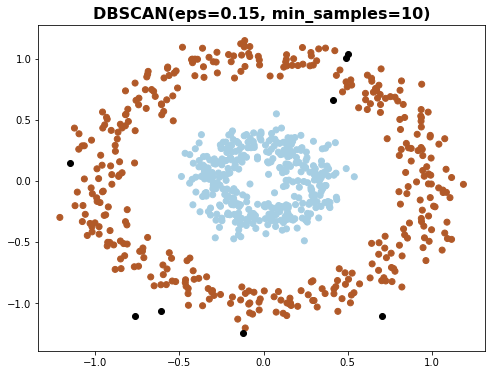

In [45]:
plt.figure(figsize=[8,6])
db1 = DBSCAN(eps=0.15,  min_samples=10).fit(X2)
print("Qtd. clusters definidos: ",  np.unique(db1.labels_).size-1, '\n')
df1 = pd.DataFrame(np.c_[X2, db1.labels_], columns = ['x1', 'x2', 'label_db1'])
plt.title("DBSCAN(eps=0.15, min_samples=10)", fontsize = 16, fontweight = 'bold')
plt.scatter(df1.loc[df1.label_db1 != -1].x1, 
            df1.loc[df1.label_db1 != -1].x2, 
            c = df1.loc[df1.label_db1 != -1].label_db1,
            cmap = plt.cm.Paired)
plt.scatter(df1.loc[df1.label_db1 == -1].x1, 
            df1.loc[df1.label_db1 == -1].x2, 
            c = 'black')
plt.show()

Qtd. clusters definidos:  12 



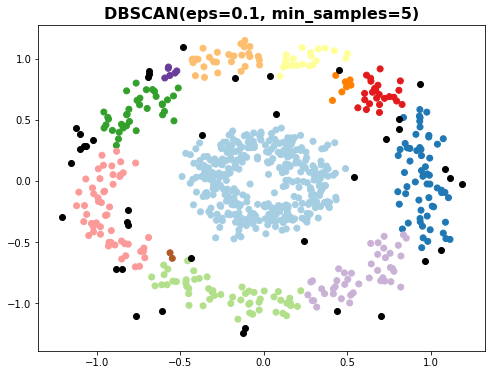

In [46]:
plt.figure(figsize=[8,6])
db1 = DBSCAN(eps=0.1,  min_samples=5).fit(X2)
print("Qtd. clusters definidos: ",  np.unique(db1.labels_).size-1, '\n')
df1 = pd.DataFrame(np.c_[X2, db1.labels_], columns = ['x1', 'x2', 'label_db1'])
plt.title("DBSCAN(eps=0.1, min_samples=5)", fontsize = 16, fontweight = 'bold')
plt.scatter(df1.loc[df1.label_db1 != -1].x1, 
            df1.loc[df1.label_db1 != -1].x2, 
            c = df1.loc[df1.label_db1 != -1].label_db1,
            cmap = plt.cm.Paired)
plt.scatter(df1.loc[df1.label_db1 == -1].x1, 
            df1.loc[df1.label_db1 == -1].x2, 
            c = 'black')
plt.show()